In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_all_phones.csv')


In [3]:
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [4]:
df.isna().sum()

phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
video_720p           0
video_1080p          0
video_4K             0
video_8K             0
video_30fps          0
video_60fps          0
video_120fps         0
video_240fps         0
video_480fps         0
video_960fps         0
price(USD)           0
dtype: int64

In [5]:
len(df)

1512

In [7]:
df.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


In [6]:
df.dtypes

phone_name            object
brand                 object
os                    object
inches               float64
resolution            object
battery                int64
battery_type          object
ram(GB)                int64
announcement_date     object
weight(g)            float64
storage(GB)            int64
video_720p              bool
video_1080p             bool
video_4K                bool
video_8K                bool
video_30fps             bool
video_60fps             bool
video_120fps            bool
video_240fps            bool
video_480fps            bool
video_960fps            bool
price(USD)           float64
dtype: object

In [8]:
for col in df.columns:
    if col not in ['announcement_date']:
        print(f'{col} : {df[col].unique()}')

phone_name : ['Y6II Compact' 'K20 plus' 'P8 Lite (2017)' ... 'GT5' 'GT5 240W'
 'vivo iQOO Z7 Pro']
brand : ['Huawei' 'LG' 'Xiaomi' 'Sony' 'Oppo' 'Samsung' 'Lenovo' 'Apple' 'Google'
 'Honor' 'Realme' 'OnePlus' 'Vivo']
os : ['Android 5.1' 'Android 7.0' 'Android 6.0' 'Android 7.1' 'Android 6'
 'Android 7.0.1' 'Android 6.0.1' 'Android 7.1.1' 'Tizen 3.0' 'Android 8.0'
 'Android 7.1.2' 'iOS 11' 'iOS 11.1.1' 'Android 8.1' 'Android 8.0 Oreo'
 'Android 9.0' 'Android 8.1 Oreo' 'iOS 12' 'Android 9.0 Pie' 'Android 10'
 'iOS 13' 'Android 11' 'iOS 14.1' 'Android 10/ Android 11' 'iOS 15'
 'Android 12' 'iOS 15.4' 'EMUI 12' 'Android' 'Android 12L' 'iOS 16'
 'Android 13' 'Android 12 or 13' 'EMUI 13']
inches : [ 5.    5.3   5.2   5.5   5.1   6.    5.46  6.2   5.15  4.5   6.44  5.7
  3.8   4.6   5.8   6.3   5.99  4.7   6.01  5.9   6.43 10.1   5.65  5.6
  6.28  5.93  6.23  5.84  6.1   5.45  6.21  5.88  6.42  6.95  6.9   6.4
  6.18  6.26  6.5   7.12  6.39  7.2   6.53  6.41  6.09  6.22  7.3   6.7
  8.    5.9

In [9]:
df.drop(['phone_name'],axis = 1, inplace = True)

In [10]:
df.head()

,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,16,...,False,False,False,True,False,False,False,False,False,120.0
1,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,16,...,True,False,False,True,False,False,False,False,False,100.0
2,Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,16,...,True,False,False,True,False,False,False,False,False,420.0
3,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,32,...,True,False,False,True,False,True,False,False,False,150.0
4,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,32,...,True,True,False,True,True,False,False,False,False,420.0


In [11]:
df[['width', 'height']] = df['resolution'].str.split('x',expand=True).astype(int)

In [12]:
df.drop(['resolution'],axis = 1, inplace = True)

In [13]:
df['announcement_date'] = pd.to_datetime(df['announcement_date'])

In [14]:
df['year'] = df['announcement_date'].dt.year

In [15]:
df.drop(['announcement_date'],axis = 1, inplace = True)

In [16]:
col_to_rep = ['video_720p','video_1080p','video_4K','video_8K','video_30fps','video_60fps','video_120fps','video_240fps','video_480fps','video_960fps']
df[col_to_rep] = df[col_to_rep].astype(int)

In [17]:
df['battery_type'].replace({'Li-Po':0,'Li-Ion':1}, inplace=True)

In [18]:
df['brand'].nunique()

13

In [19]:
df['brand'].value_counts()

Xiaomi     264
Oppo       213
Samsung    206
Vivo       168
Realme     157
Huawei     137
Honor      124
LG          75
OnePlus     47
Lenovo      43
Sony        37
Apple       22
Google      19
Name: brand, dtype: int64

In [20]:
df1 = pd.get_dummies(df,columns = ['brand','os'])

In [21]:
X = df1.drop(['price(USD)'],axis = 1)
y=df1['price(USD)']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# LinearRegression

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
lr.score(X_test,y_test)

0.23247827059017578

# random forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf = RandomForestRegressor(n_estimators = 50)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [28]:
rf.score(X_train,y_train)

0.8622741922905263

# SVR

In [29]:
from sklearn.svm import SVR

In [30]:
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [31]:
svr.score(X_train,y_train)

0.1624854708588599

# KNN

In [32]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [33]:
knn.score(X_train,y_train)

0.3026417195226375

In [34]:
knn.score(X_test,y_test)

0.2182566090847562

# Decision tree


In [35]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [36]:
dt.score(X_train,y_train)

0.9813353592307157

In [37]:
dt.score(X_test,y_test)

-0.1401009868925065

In [38]:
y_pred = dt.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Absolute Error (MAE): 168.99
Mean Squared Error (MSE): 91731.86


In [41]:
X_train.shape

(1209, 66)

<BarContainer object of 1512 artists>

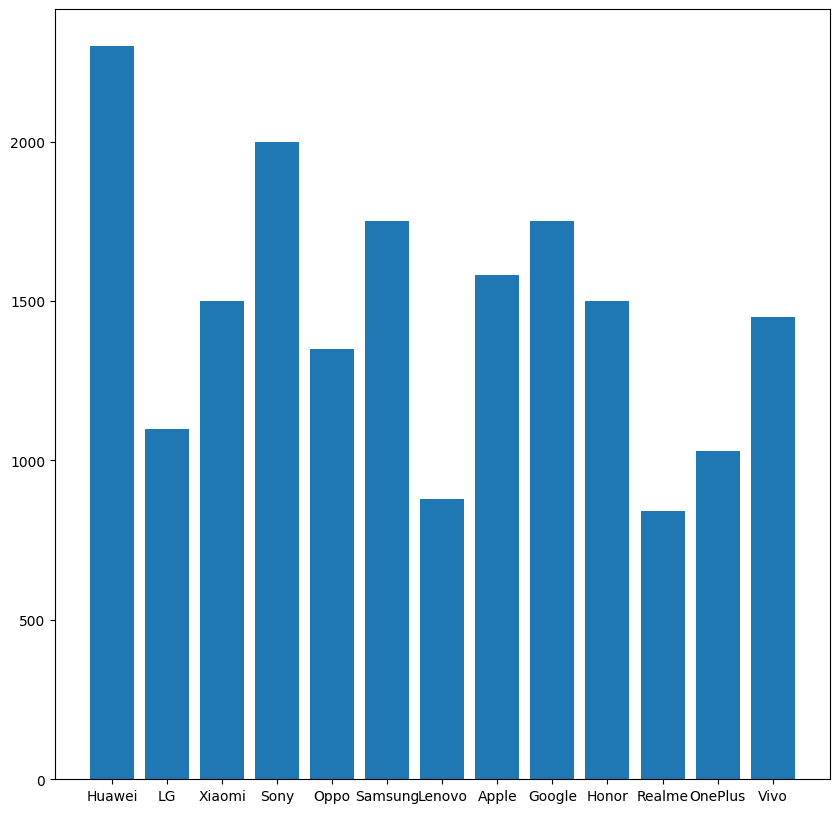

In [43]:
plt.figure(figsize= (10,10))
plt.bar(df['brand'],df['price(USD)'])

In [44]:
from sklearn.preprocessing import MinMaxScaler
s_x = MinMaxScaler()
s_y = MinMaxScaler()
X_scaled = X.copy()
y_scaled = y.copy()
col_too_scales = ['price(USD)','inches', 'battery', 'ram(GB)', 'weight(g)', 'storage(GB)','width', 'height']
col_too_scale = ['inches', 'battery', 'ram(GB)', 'weight(g)', 'storage(GB)','width', 'height']
X_scaled[col_too_scale] = s_x.fit_transform(X[col_too_scale])
y_scaled = s_y.fit_transform([y])
df_scaled = df1.copy()
df_scaled[col_too_scales] = s_x.fit_transform(df1[col_too_scales])

In [45]:
X1 = df_scaled.drop(['price(USD)'],axis = 1)
y1 = df_scaled['price(USD)']
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=5)

In [46]:
df_scaled

,inches,battery,battery_type,ram(GB),weight(g),storage(GB),video_720p,video_1080p,video_4K,video_8K,...,os_EMUI 13,os_Tizen 3.0,os_iOS 11,os_iOS 11.1.1,os_iOS 12,os_iOS 13,os_iOS 14.1,os_iOS 15,os_iOS 15.4,os_iOS 16
0,0.181818,0.069810,0,0.043478,0.027027,0.029354,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.227273,0.161908,1,0.043478,0.027027,0.029354,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.212121,0.217167,1,0.130435,0.045946,0.029354,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.257576,0.419783,0,0.130435,0.094595,0.060665,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.196970,0.254006,1,0.130435,0.040541,0.060665,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,0.430303,0.585559,0,0.304348,0.162162,0.499022,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1508,0.442424,0.585559,0,0.304348,0.162162,0.248532,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1509,0.445455,0.629766,0,0.652174,0.202703,0.499022,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1510,0.445455,0.511881,0,1.000000,0.202703,0.000000,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
d = df.copy()


In [48]:
d.head()

,brand,os,inches,battery,battery_type,ram(GB),weight(g),storage(GB),video_720p,video_1080p,...,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD),width,height,year
0,Huawei,Android 5.1,5.0,2200,0,2,140.0,16,1,0,...,1,0,0,0,0,0,120.0,720,1280,2016
1,LG,Android 7.0,5.3,2700,1,2,140.0,16,0,1,...,1,0,0,0,0,0,100.0,720,1280,2016
2,Huawei,Android 7.0,5.2,3000,1,4,147.0,16,0,1,...,1,0,0,0,0,0,420.0,1080,1920,2017
3,Xiaomi,Android 6.0,5.5,4100,0,4,165.0,32,1,1,...,1,0,1,0,0,0,150.0,1080,1920,2017
4,Huawei,Android 7.0,5.1,3200,1,4,145.0,32,1,1,...,1,1,0,0,0,0,420.0,1080,1920,2017


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d['brand'] = le.fit_transform(d['brand'])
d['os'] = le.fit_transform(d['os'])

In [52]:
d

,brand,os,inches,battery,battery_type,ram(GB),weight(g),storage(GB),video_720p,video_1080p,...,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD),width,height,year
0,3,8,5.00,2200,0,2,140.0,16,1,0,...,1,0,0,0,0,0,120.000,720,1280,2016
1,4,12,5.30,2700,1,2,140.0,16,0,1,...,1,0,0,0,0,0,100.000,720,1280,2016
2,3,12,5.20,3000,1,4,147.0,16,0,1,...,1,0,0,0,0,0,420.000,1080,1920,2017
3,12,10,5.50,4100,0,4,165.0,32,1,1,...,1,0,1,0,0,0,150.000,1080,1920,2017
4,3,12,5.10,3200,1,4,145.0,32,1,1,...,1,1,0,0,0,0,420.000,1080,1920,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,11,7,6.64,5000,0,8,190.0,256,0,1,...,1,0,0,0,0,0,170.000,1080,2388,2023
1508,8,7,6.72,5000,0,8,190.0,128,0,1,...,1,0,0,0,0,0,182.880,1080,2400,2023
1509,8,7,6.74,5240,0,16,205.0,256,1,1,...,0,1,0,0,0,0,380.000,1240,2772,2023
1510,8,7,6.74,4600,0,24,205.0,1,1,1,...,0,1,0,0,0,0,470.000,1240,2772,2023


In [53]:
X2 = d.drop(['price(USD)'],axis = 1)
y2 = d['price(USD)']

# score comparision

In [54]:
def fit_score(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
    score = {}
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    score['LineraR'] = lr.score(X_test,y_test)
    knn = KNeighborsRegressor(n_neighbors=10)
    knn.fit(X_train,y_train)
    score['KNN'] = knn.score(X_test,y_test)
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train,y_train)
    score['Decision'] = dt.score(X_test,y_test)
    svr = SVR(kernel='linear')
    svr.fit(X_train,y_train)
    score['SVR'] = svr.score(X_test,y_test)
    rf = RandomForestRegressor(n_estimators = 50)
    rf.fit(X_train,y_train)
    score['Random'] = rf.score(X_test,y_test)
    return score

In [55]:
norm = fit_score(X,y)
norm

{'LineraR': 0.2578872229706237,
 'KNN': 0.2817114898931744,
 'Decision': -0.05283737496024821,
 'SVR': 0.2099399934203734,
 'Random': 0.28360136976169337}

## scaled dataset

In [56]:
scald = fit_score(X1,y1)
scald

{'LineraR': -5.0104218395604315e+23,
 'KNN': 0.23432747607754878,
 'Decision': -0.0975854191337362,
 'SVR': -4125.413438327098,
 'Random': 0.23733826153174864}

## label encoded

In [57]:
labl = fit_score(X2,y2)
labl

{'LineraR': 0.2344138295190089,
 'KNN': 0.29062421261801974,
 'Decision': -0.06962002759300123,
 'SVR': 0.2150060546700837,
 'Random': 0.2796554436412203}